In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

sns.set()

## Boundary Layer Thickness Plots

In [27]:
eta_m = 3.918028221802822
eta = pd.read_csv('eta_t.csv') #Thermal etas for Pr numbers
eta['eta_m'] = [eta_m]*eta.shape[0] #Momentum eta for all Pr numbers]
display(eta)

,Pr,eta_t,eta_m
0,0.1,9.637613,3.918028
1,0.2,8.886200,3.918028
2,0.5,6.436737,3.918028
3,1.0,4.909938,3.918028
4,2.0,3.799065,3.918028
5,5.0,2.749842,3.918028
6,10.0,2.168599,3.918028


In [3]:
#z = x/L
def boundary(eta, z):
    return eta*np.sqrt(z)

def deltaV():
    pass

def deltaT():
    pass

z = np.linspace(0,1,10000)

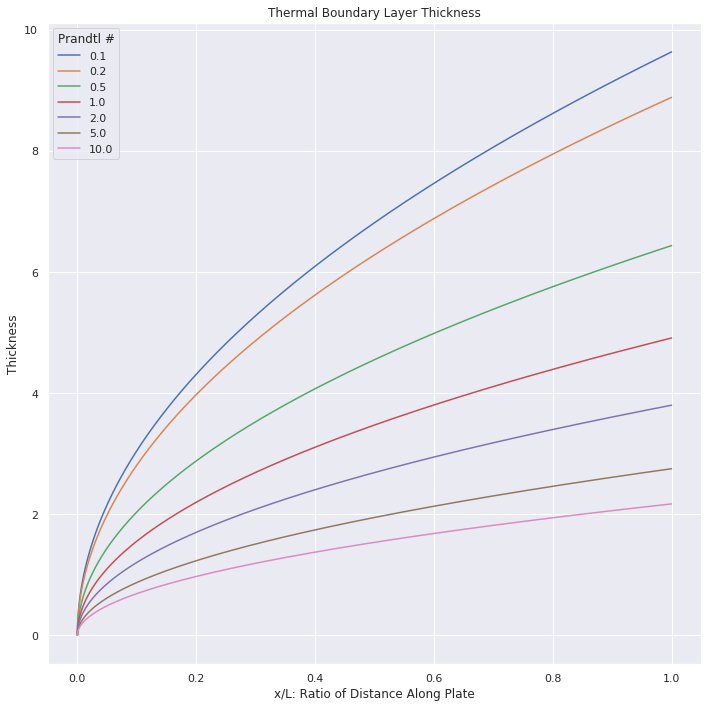

In [5]:
#plot stuff for eta_t
fig_t, ax = plt.subplots(1,1,figsize=(10,10))
for _, row in eta.iterrows():
    ax.plot(z, boundary(row['eta_t'], z))

ax.set_title('Thermal Boundary Layer Thickness')
ax.set_xlabel('x/L: Ratio of Distance Along Plate')
ax.set_ylabel('Thickness')
ax.legend(list(eta['Pr']), title='Prandtl #')
plt.tight_layout()

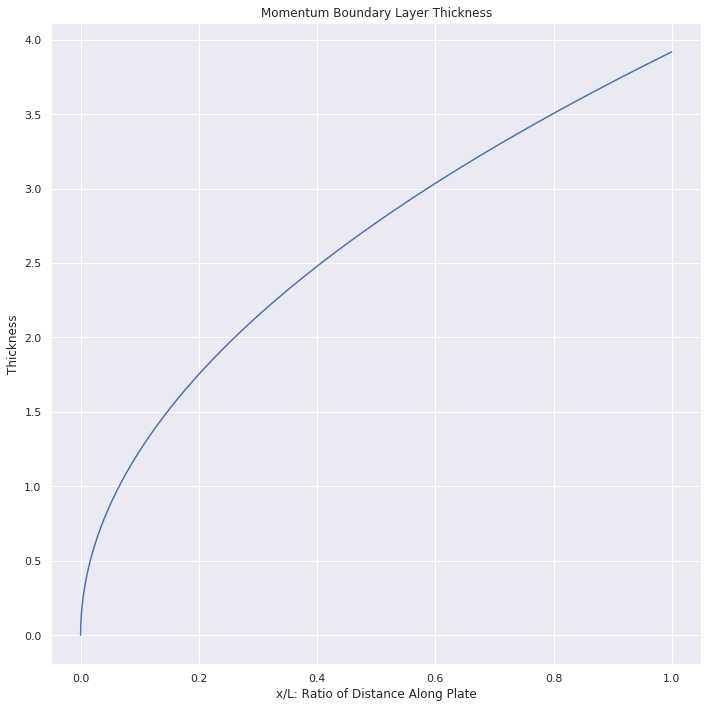

In [7]:
#plot stuff for eta_m
fig_m, ax = plt.subplots(1,1,figsize=(10,10))

ax.set_title('Momentum Boundary Layer Thickness')
ax.set_xlabel('x/L: Ratio of Distance Along Plate')
ax.set_ylabel('Thickness')
ax.plot(z, boundary(eta_m, z))
plt.tight_layout()

In [8]:
fig_t.savefig('Thermal-Boundary.png')
fig_m.savefig('Momentum-Boundary.png')

## Dimensionless Velocities and Temperatures / Prandtl # Plot

In [2]:
prandtl = [0.1, 0.2, 0.5, 1, 2, 5, 10]
eqs = {} #dictionary mapping from prandtl number to dataframe of functions

for n in prandtl:
    eqs[n] = pd.read_csv('Pr='+str(n)+'.csv')
    
display(eqs[0.5])

eta_m = 3.918028221802822
etaVal = pd.read_csv('eta_t.csv') #Thermal etas for Pr numbers
etaValP = etaVal.set_index('Pr')
etaValP['eta_m'] = [eta_m]*etaValP.shape[0] #Momentum eta for all Pr numbers]
display(etaValP)

,eta,F,dF,d2F,G,dG
0,0.0,0.000000,0.000000,3.320573e-01,1.000000e+00,-0.259298
1,0.1,0.001660,0.033206,3.320482e-01,9.740702e-01,-0.259295
2,0.2,0.006641,0.066408,3.319838e-01,9.481417e-01,-0.259270
3,0.3,0.014941,0.099599,3.318094e-01,9.222177e-01,-0.259202
4,0.4,0.026560,0.132764,3.314699e-01,8.963036e-01,-0.259069
...,...,...,...,...,...,...
96,9.6,7.879212,1.000000,4.254435e-08,2.553466e-05,-0.000093
97,9.7,7.979212,1.000000,2.862270e-08,1.711912e-05,-0.000076
98,9.8,8.079212,1.000000,1.916070e-08,1.022517e-05,-0.000062
99,9.9,8.179212,1.000000,1.276275e-08,4.591803e-06,-0.000051


,eta_t,eta_m
Pr,,
0.1,9.637613,3.918028
0.2,8.886200,3.918028
0.5,6.436737,3.918028
1.0,4.909938,3.918028
2.0,3.799065,3.918028
5.0,2.749842,3.918028
10.0,2.168599,3.918028


### Q2

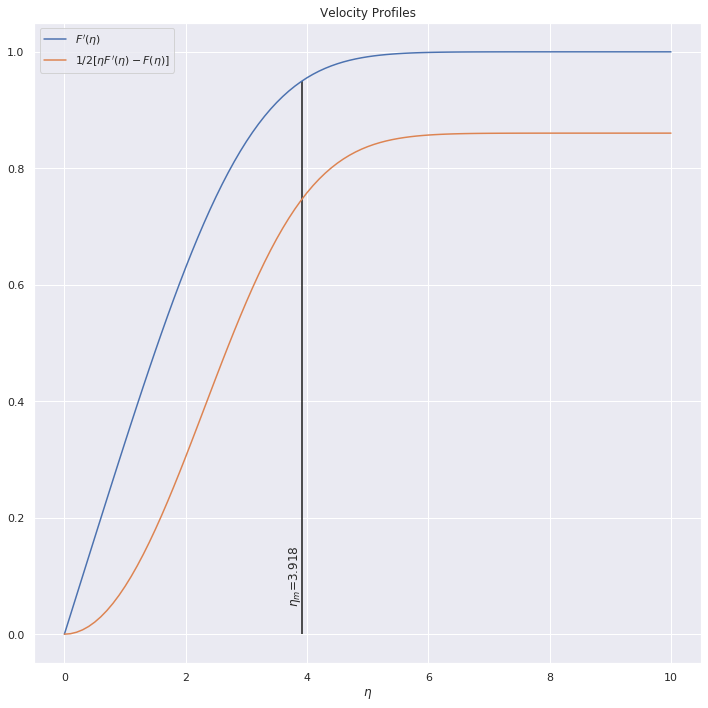

In [70]:
fig_F, ax = plt.subplots(1, 1, figsize=(10,10))
etaVec = eqs[0.1].loc[:, 'eta']
F = eqs[0.1].loc[:,'F']
dF = eqs[0.1].loc[:,'dF']

ax.plot(etaVec, dF)
ax.plot(etaVec, 0.5*(etaVec*dF-F))
ax.vlines(eta_m, 0 ,0.95)
plt.text(eta_m-0.25, 0.1, '$\eta_m$='+'%.3f'%eta_m, rotation=90, verticalalignment='center')

ax.set_title('Velocity Profiles')
ax.set_xlabel('$\eta$')
ax.legend(["$F'(\eta)$", "$1/2[\eta F'(\eta)-F(\eta)]$"])
plt.tight_layout()

### Q3

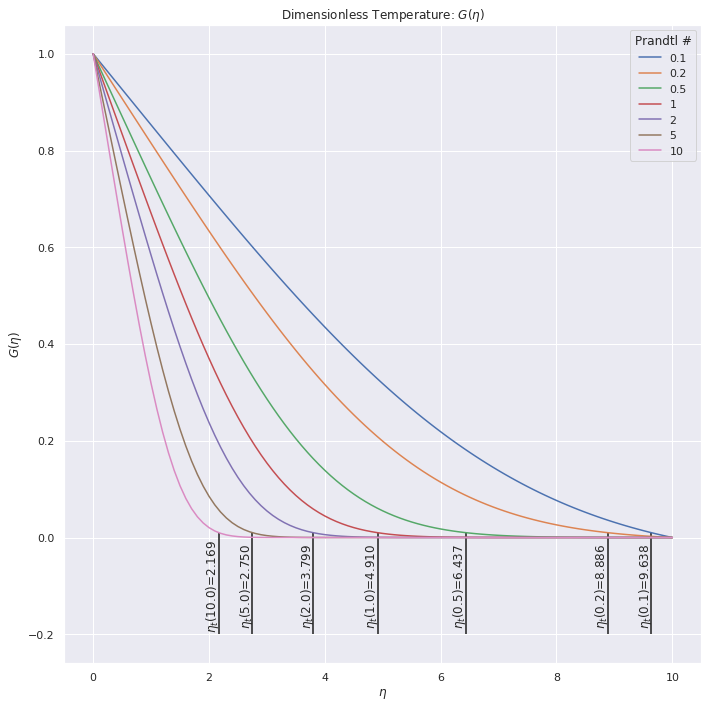

In [38]:
fig_G, ax = plt.subplots(1, 1, figsize=(10,10))

ax.set_title('Dimensionless Temperature: $G(\eta)$')
ax.set_xlabel('$\eta$')
ax.set_ylabel('$G(\eta)$')

for n in prandtl:
    df = eqs[n]
    ax.plot(df['eta'], df['G'])
    
    val = etaValP.at[float(n),'eta_t']
    ymin = -0.2
    ymax = 0.01
    ax.vlines(val, ymin=ymin, ymax=ymax, color='k')
    
    #Need written labels as well
    #eta_t(Pr) = eta_t
    #eta_t(n) = val
    eps = 0.01
    plt.text(val-0.25, int((ymax-ymin)/2)-0.1, '$\eta_t$('+'%.1f'%n+')='+'%.3f'%val, rotation=90, verticalalignment='center')
    
plt.legend(prandtl, title='Prandtl #')
plt.tight_layout()

### Q6

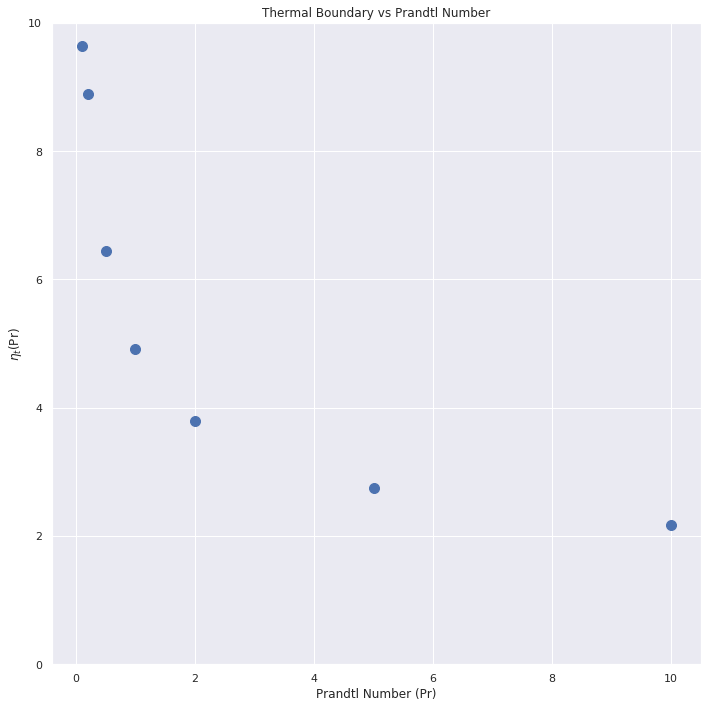

In [46]:
fig_Pr, ax = plt.subplots(1,1, figsize=(10,10))
ax.scatter(etaVal.loc[:,'Pr'], etaVal.loc[:, 'eta_t'], s=100)

ax.set_title('Thermal Boundary vs Prandtl Number')
ax.set_xlabel('Prandtl Number (Pr)')
ax.set_ylabel('$\eta_t$(Pr)')
ax.set_ylim(0,10)
plt.tight_layout()

In [71]:
fig_F.savefig('Velocity.png')
fig_G.savefig('Temperature.png')
fig_Pr.savefig('EtaT-Prandtl.png')

In [3]:
# float_format="%.6f"

print(eqs[5].loc[0:5,:].to_latex(index=False))
print(eqs[5].loc[95:100,:].to_latex(index=False))

\begin{tabular}{rrrrrr}
\toprule
 eta &         F &        dF &       d2F &         G &        dG \\
\midrule
 0.0 &  0.000000 &  0.000000 &  0.332057 &  1.000000 & -0.576689 \\
 0.1 &  0.001660 &  0.033206 &  0.332048 &  0.942333 & -0.576609 \\
 0.2 &  0.006641 &  0.066408 &  0.331984 &  0.884694 & -0.576051 \\
 0.3 &  0.014941 &  0.099599 &  0.331809 &  0.827155 & -0.574539 \\
 0.4 &  0.026560 &  0.132764 &  0.331470 &  0.769834 & -0.571605 \\
 0.5 &  0.041493 &  0.165885 &  0.330911 &  0.712896 & -0.566803 \\
\bottomrule
\end{tabular}

\begin{tabular}{rrrrrr}
\toprule
  eta &         F &   dF &           d2F &             G &            dG \\
\midrule
  9.5 &  7.779212 &  1.0 &  6.292236e-08 &  1.022145e-15 & -2.834154e-30 \\
  9.6 &  7.879212 &  1.0 &  4.254435e-08 &  1.022145e-15 & -9.068577e-31 \\
  9.7 &  7.979212 &  1.0 &  2.862270e-08 &  1.022145e-15 & -2.970544e-31 \\
  9.8 &  8.079212 &  1.0 &  1.916070e-08 &  1.022145e-15 & -9.974141e-32 \\
  9.9 &  8.179212 &  1.0 &  1.276